#Практическая работа 2

##Введение

Цель: Сегментировать студентов на основе их ответов в анкете, касающейся различных аспектов учебного процесса

##Понимание бизнес-задачи

Рассуждения и формулировки по данному этапу

##Понимание данных

Описание данных, результаты EDA, включая графики и выводы по каждому пункту

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Учёба/3 курс/Основы машинного обучения/ПР2/dlia_studentov.xlsx')

In [ ]:
print("Размерность:", data.shape)

Размерность: (711, 23)


In [ ]:
print("Типы данных по столбцам:")
print(data.dtypes)

Типы данных по столбцам:
ID                                                                                                                                             int64
Время создания                                                                                                                                object
На каком факультете/в каком институте Вы обучаетесь?                                                                                          object
Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?                                                     object
Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)                  object
Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?    object
Был ли автоматический мониторинг присутствия студента на занятии (например, посре

In [ ]:
data.head(5)

,ID,Время создания,На каком факультете/в каком институте Вы обучаетесь?,"Какая платформа для обучения дисциплине ""ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ"" использовалась?","Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)","Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?","Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)","Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?","Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?","Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?",...,Необходим ли встроенный электронный журнал прогресса выполненных работ студентом?,Были ли встроенны в электронный курс видеолекции?,Необходимо ли встраивать в электронный курс видеолекции?,Были ли встроенные в электронный курс тесты по материалом видео лекций?,Была ли предусмотрена рефлексия (отзыв) после выполнения каждого практического задания?,Необходима ли рефлексия (отзыв) после выполнения каждого практического задания?,Была ли предусмотрена рефлексия (отзыв) после завершения работы по дисциплине?,Необходима ли рефлексия (отзыв) после завершения работы по дисциплине?,Было ли организовано взаимодействие с преподавателями посредством мессенджеров?,Необходимо ли организовывать взаимодействие с преподавателями посредством мессенджеров?
0,1408291245,2023-06-07 20:41:17,институт истории и социальных наук,Moodle,нет,нет,нет,нет,да,нет,...,да,да,нет,да,нет,да,нет,да,да,да
1,1405883214,2023-06-05 09:02:21,институт педагогики,Moodle,да,да,нет,да,нет,да,...,да,да,да,да,да,да,да,да,да,да
2,1405869646,2023-06-05 08:44:38,институт педагогики,Moodle,да,да,да,да,да,да,...,да,да,да,да,да,да,да,да,да,да
3,1405856131,2023-06-05 08:26:39,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,да,да,да,да,да,да
4,1405854542,2023-06-05 08:24:47,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,нет,нет,да,нет,нет,да


In [ ]:
print("Пропуски:", data.isnull().sum())

Пропуски: ID                                                                                                                                            0
Время создания                                                                                                                                0
На каком факультете/в каком институте Вы обучаетесь?                                                                                          0
Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?                                                     0
Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)                  0
Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?    0
Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)                             

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

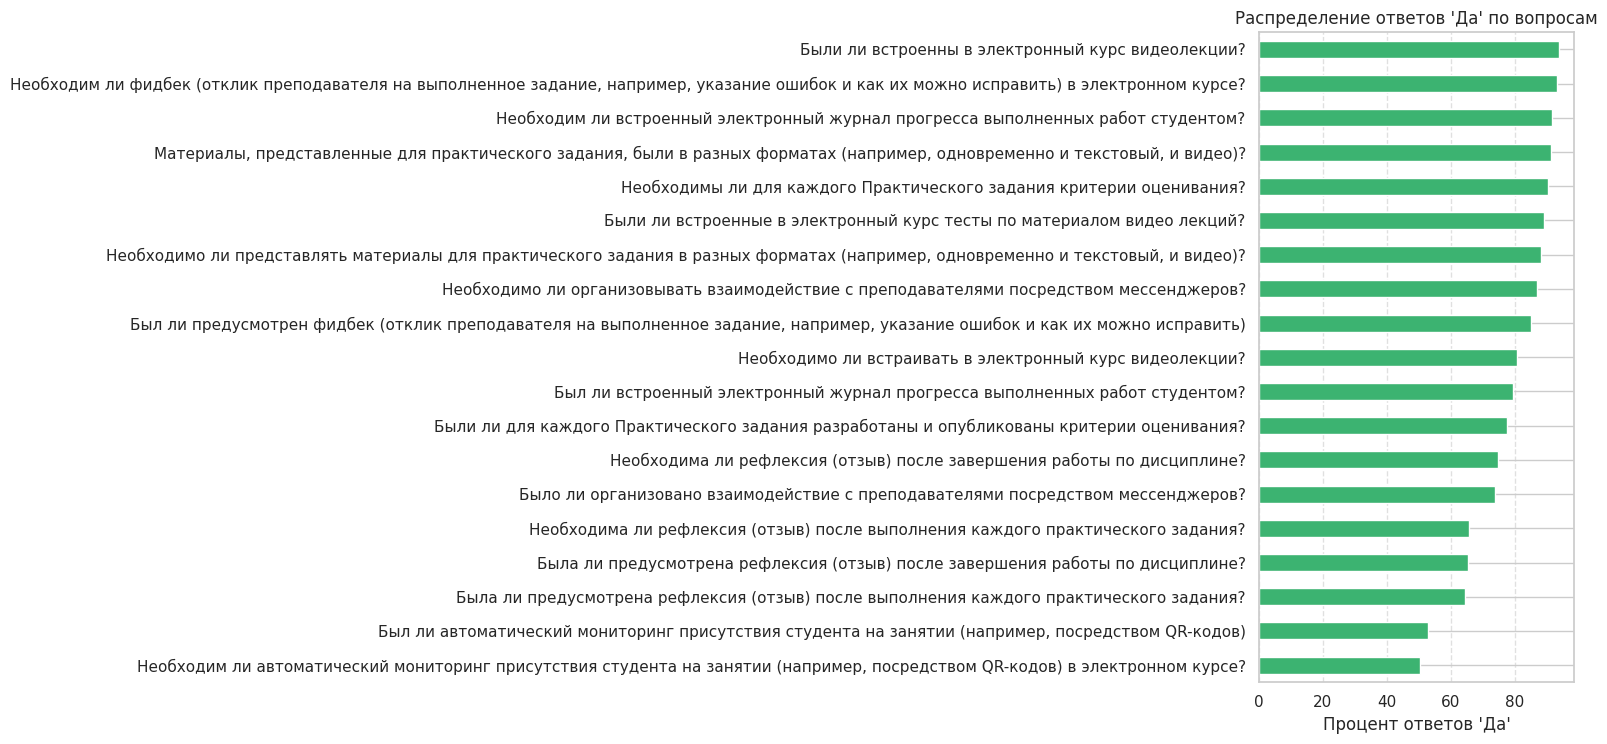

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

exclude_cols = [
    "На каком факультете/в каком институте Вы обучаетесь?",
    "Время создания",
    'Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?'
]

binary_cols = [col for col in data.select_dtypes(include="object").columns if col not in exclude_cols]

yes_percentages = {}

for col in binary_cols:
    counts = data[col].value_counts(normalize=True)
    yes = counts.get("Да") or counts.get("да") or 0
    yes_percentages[col] = yes * 100

yes_df = pd.DataFrame.from_dict(yes_percentages, orient='index', columns=['% Да'])
yes_df.sort_values(by='% Да', inplace=True)

plt.figure(figsize=(16, len(yes_df) * 0.4))
yes_df['% Да'].plot(kind='barh', color='mediumseagreen')
plt.xlabel("Процент ответов 'Да'")
plt.title("Распределение ответов 'Да' по вопросам")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

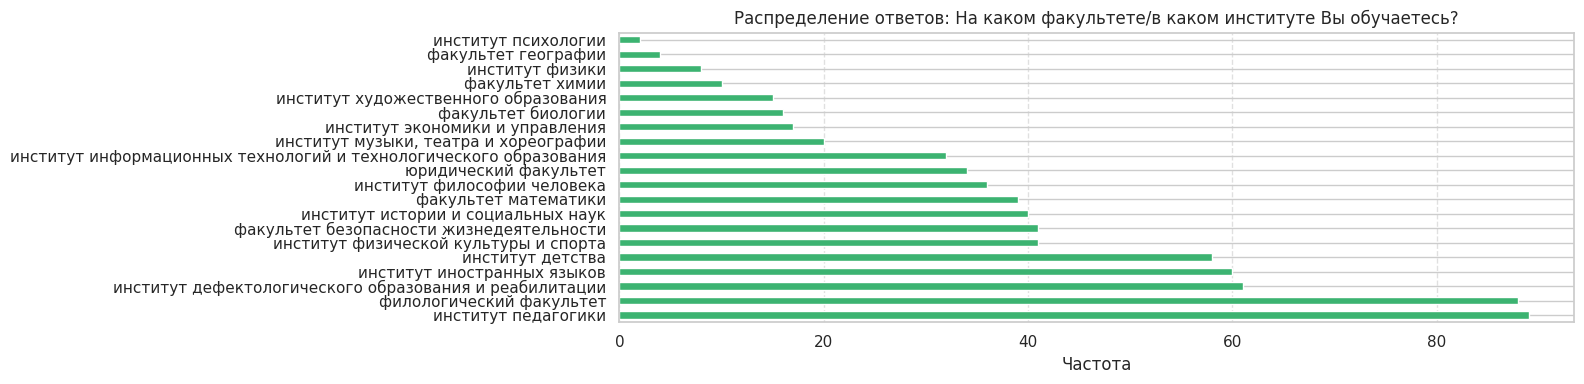

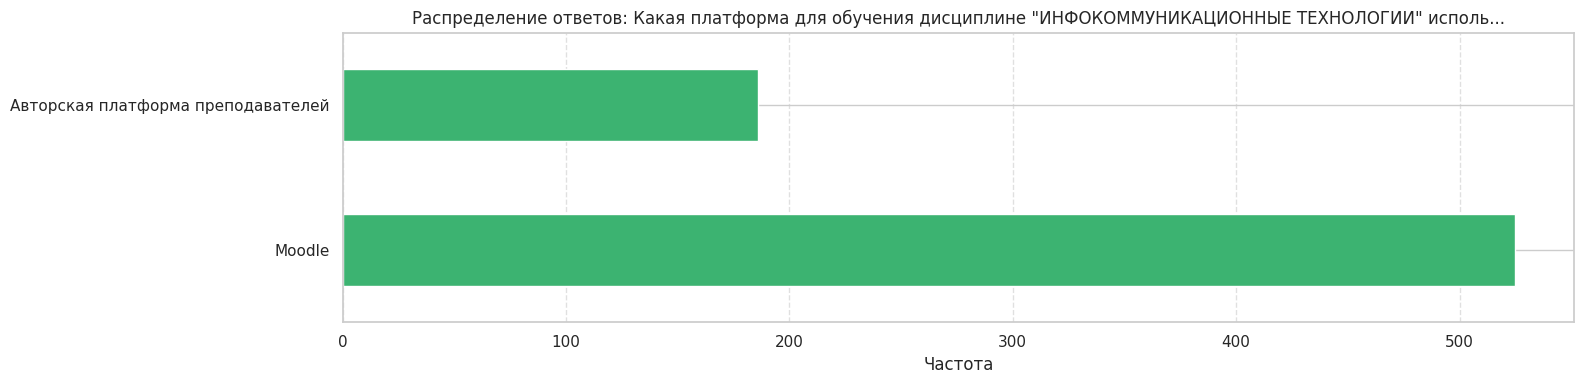

In [ ]:
sns.set(style="whitegrid")

custom_cols = [
    "На каком факультете/в каком институте Вы обучаетесь?",
    'Какая платформа для обучения дисциплине "ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ" использовалась?'
]

for col in custom_cols:
    plt.figure(figsize=(16, 4))
    data[col].value_counts(dropna=False).plot(kind='barh', color='mediumseagreen')
    plt.title(f"Распределение ответов: {col[:80]}{'...' if len(col) > 80 else ''}")
    plt.xlabel("Частота")
    plt.gca().set_ylabel('')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

####Переименование колонок для удобства

In [ ]:
rename_dict = {
    "ID": "id",
    "Время создания": "creation_time",
    "На каком факультете/в каком институте Вы обучаетесь?": "faculty",
    "Какая платформа для обучения дисциплине \"ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ\" использовалась?": "platform_used",
    "Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)": "feedback_provided",
    "Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?": "feedback_needed",
    "Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)": "monitoring_provided",
    "Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?": "monitoring_needed",
    "Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?": "multiformat_materials_provided",
    "Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?": "multiformat_materials_needed",
    "Были ли для каждого Практического задания разработаны и опубликованы критерии оценивания?": "criteria_provided",
    "Необходимы ли для каждого Практического задания критерии оценивания?": "criteria_needed",
    "Был ли встроенный электронный журнал прогресса выполненных работ студентом?": "e_journal_provided",
    "Необходим ли встроенный электронный журнал прогресса выполненных работ студентом?": "e_journal_needed",
    "Были ли встроенны в электронный курс видеолекции?": "video_lectures_provided",
    "Необходимо ли встраивать в электронный курс видеолекции?": "video_lectures_needed",
    "Были ли встроенные в электронный курс тесты по материалом видео лекций?": "video_tests_provided",
    "Была ли предусмотрена рефлексия (отзыв) после выполнения каждого практического задания?": "reflection_after_task_provided",
    "Необходима ли рефлексия (отзыв) после выполнения каждого практического задания?": "reflection_after_task_needed",
    "Была ли предусмотрена рефлексия (отзыв) после завершения работы по дисциплине?": "reflection_after_course_provided",
    "Необходима ли рефлексия (отзыв) после завершения работы по дисциплине?": "reflection_after_course_needed",
    "Было ли организовано взаимодействие с преподавателями посредством мессенджеров?": "messaging_contact_provided",
    "Необходимо ли организовывать взаимодействие с преподавателями посредством мессенджеров?": "messaging_contact_needed"
}

In [ ]:
data.head()

,id,creation_time,faculty,platform_used,feedback_provided,feedback_needed,monitoring_provided,monitoring_needed,multiformat_materials_provided,multiformat_materials_needed,...,e_journal_needed,video_lectures_provided,video_lectures_needed,video_tests_provided,reflection_after_task_provided,reflection_after_task_needed,reflection_after_course_provided,reflection_after_course_needed,messaging_contact_provided,messaging_contact_needed
0,1408291245,2023-06-07 20:41:17,институт истории и социальных наук,Moodle,нет,нет,нет,нет,да,нет,...,да,да,нет,да,нет,да,нет,да,да,да
1,1405883214,2023-06-05 09:02:21,институт педагогики,Moodle,да,да,нет,да,нет,да,...,да,да,да,да,да,да,да,да,да,да
2,1405869646,2023-06-05 08:44:38,институт педагогики,Moodle,да,да,да,да,да,да,...,да,да,да,да,да,да,да,да,да,да
3,1405856131,2023-06-05 08:26:39,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,да,да,да,да,да,да
4,1405854542,2023-06-05 08:24:47,институт педагогики,Moodle,да,да,нет,нет,да,да,...,да,да,да,да,нет,нет,да,нет,нет,да


####Перевод в бинарный столбцов с ответами да/нет и столбца с факультетом

In [ ]:
data_bin = data.copy()

exclude_cols = ['id', 'creation_time', 'faculty']

for col in data_bin.columns:
    if col not in exclude_cols and data_bin[col].dtype == 'object':
        if col == 'platform_used':
            data_bin[col] = data_bin[col].map({'Moodle': 1, 'Авторская платформа преподавателей': 0})
        else:
            data_bin[col] = data_bin[col].map({'да': 1, 'нет': 0})

In [ ]:
data_bin.head()

,id,creation_time,faculty,platform_used,feedback_provided,feedback_needed,monitoring_provided,monitoring_needed,multiformat_materials_provided,multiformat_materials_needed,...,e_journal_needed,video_lectures_provided,video_lectures_needed,video_tests_provided,reflection_after_task_provided,reflection_after_task_needed,reflection_after_course_provided,reflection_after_course_needed,messaging_contact_provided,messaging_contact_needed
0,1408291245,2023-06-07 20:41:17,институт истории и социальных наук,1,0,0,0,0,1,0,...,1,1,0,1,0,1,0,1,1,1
1,1405883214,2023-06-05 09:02:21,институт педагогики,1,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,1405869646,2023-06-05 08:44:38,институт педагогики,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1405856131,2023-06-05 08:26:39,институт педагогики,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1405854542,2023-06-05 08:24:47,институт педагогики,1,1,1,0,0,1,1,...,1,1,1,1,0,0,1,0,0,1


####Корреляционная матрица

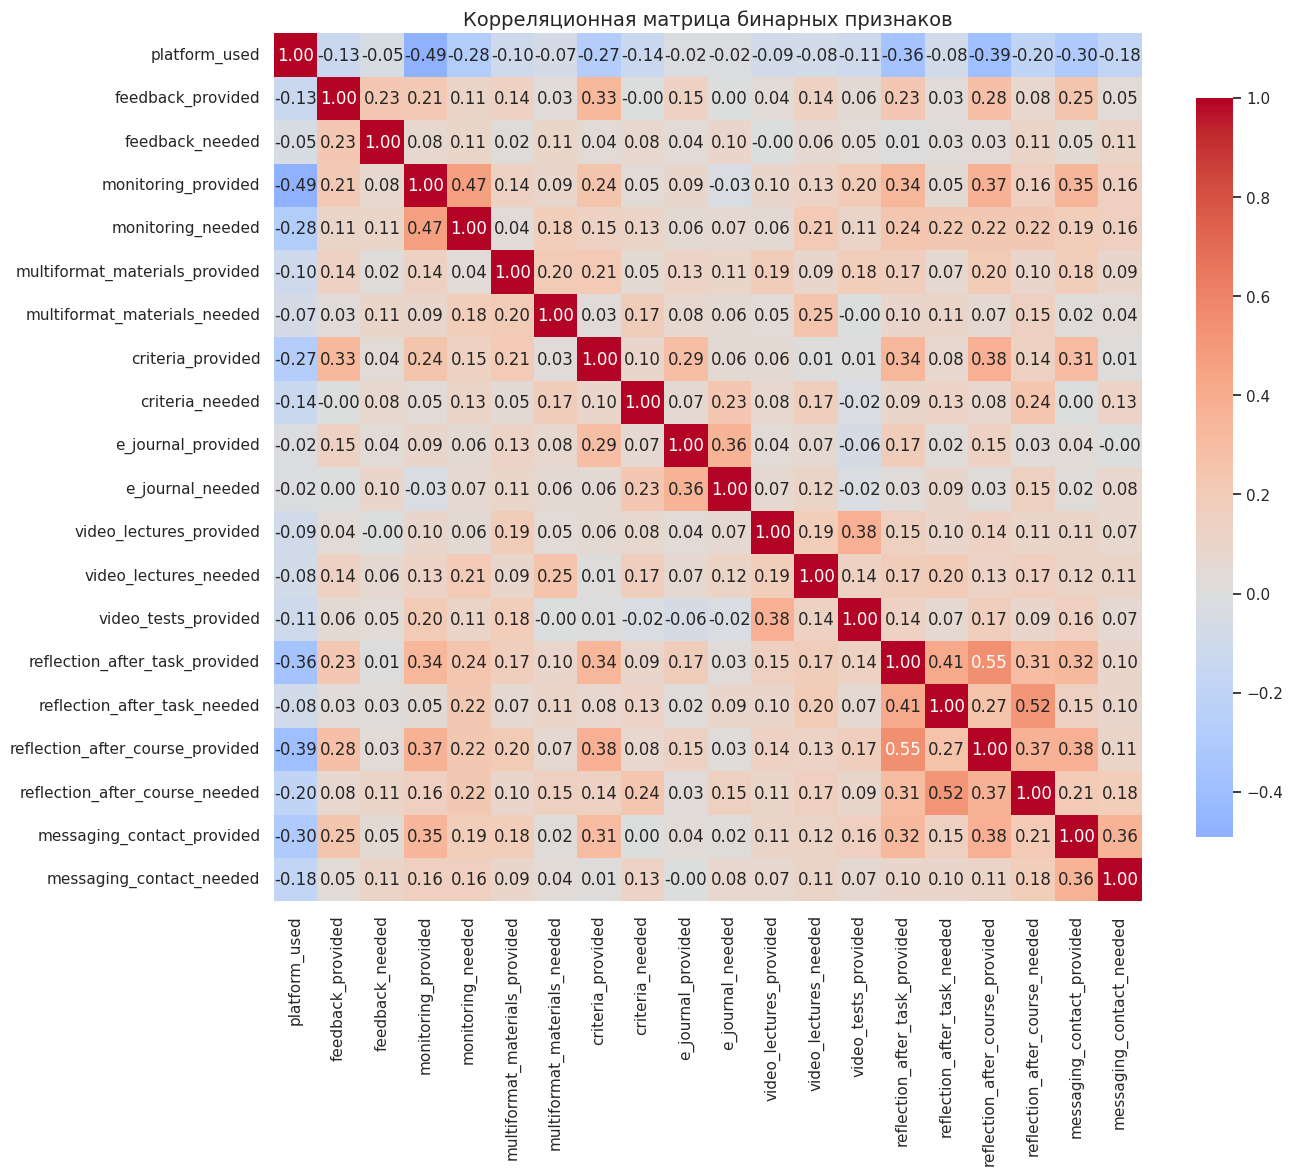

In [ ]:
binary_cols = [col for col in data_bin.columns if data_bin[col].dtype in ['int64', 'float64'] and col not in ['id']]

corr_matrix = data_bin[binary_cols].corr()


plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            square=True, cbar_kws={"shrink": 0.8})
plt.title("Корреляционная матрица бинарных признаков", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

####Выводы по этой части
1. На данном этапе можно исключить данные по Факультету, Времени создания и ID
2. На основе корреляционной матрицы – связи между признаками умеренные

##Подготовка данных

Подробное описание всех шагов по подготовке данных, включая обработку пропусков, кодирование, снижение размерности (с описанием подбора параметров UMAP).

In [ ]:
data_bin.head()

,id,creation_time,faculty,platform_used,feedback_provided,feedback_needed,monitoring_provided,monitoring_needed,multiformat_materials_provided,multiformat_materials_needed,...,e_journal_needed,video_lectures_provided,video_lectures_needed,video_tests_provided,reflection_after_task_provided,reflection_after_task_needed,reflection_after_course_provided,reflection_after_course_needed,messaging_contact_provided,messaging_contact_needed
0,1408291245,2023-06-07 20:41:17,институт истории и социальных наук,1,0,0,0,0,1,0,...,1,1,0,1,0,1,0,1,1,1
1,1405883214,2023-06-05 09:02:21,институт педагогики,1,1,1,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2,1405869646,2023-06-05 08:44:38,институт педагогики,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1405856131,2023-06-05 08:26:39,институт педагогики,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1405854542,2023-06-05 08:24:47,институт педагогики,1,1,1,0,0,1,1,...,1,1,1,1,0,0,1,0,0,1


In [ ]:
print(data_bin.isnull().sum())

id                                  0
creation_time                       0
faculty                             0
platform_used                       0
feedback_provided                   0
feedback_needed                     0
monitoring_provided                 0
monitoring_needed                   0
multiformat_materials_provided      0
multiformat_materials_needed        0
criteria_provided                   0
criteria_needed                     0
e_journal_provided                  0
e_journal_needed                    0
video_lectures_provided             0
video_lectures_needed               0
video_tests_provided                0
reflection_after_task_provided      0
reflection_after_task_needed        0
reflection_after_course_provided    0
reflection_after_course_needed      0
messaging_contact_provided          0
messaging_contact_needed            0
dtype: int64


####Удаление ID, Времени создания и Факультета

In [ ]:
exclude_cols = ['id', 'creation_time', 'faculty']
features_for_clustering = data_bin.drop(columns=exclude_cols)

In [ ]:
features_for_clustering.shape

(711, 21)

####Применение UMAP 2D

In [ ]:
from umap import UMAP

Использую метрику Жаккара (Jaccard), которая учитывает специфику бинарных признаков:

In [ ]:
umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='jaccard', random_state=42)
embedding_2d = umap_model.fit_transform(features_for_clustering)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


####Визуализация

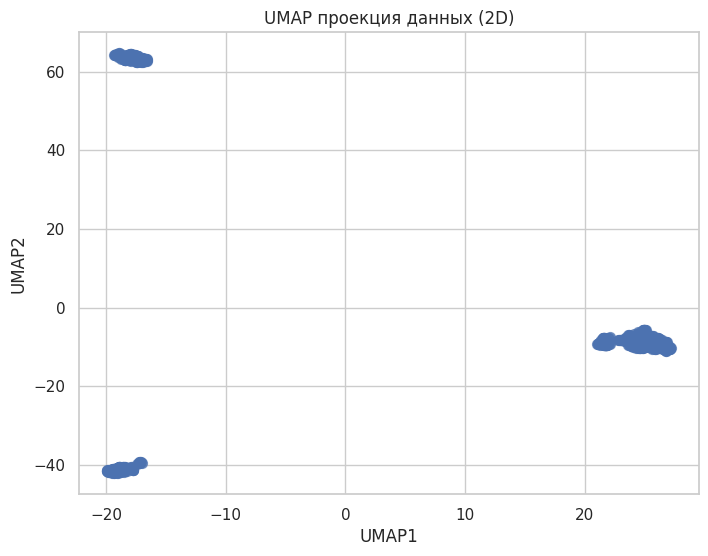

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=50, alpha=0.7)
plt.title('UMAP проекция данных (2D)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()


umap_df = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
umap_df.to_csv('umap_2d_projection.csv', index=False)

####Применение UMAP 3D

In [ ]:
umap_model_3d = UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='jaccard', random_state=42)
embedding_3d = umap_model_3d.fit_transform(features_for_clustering)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


####Визуализация

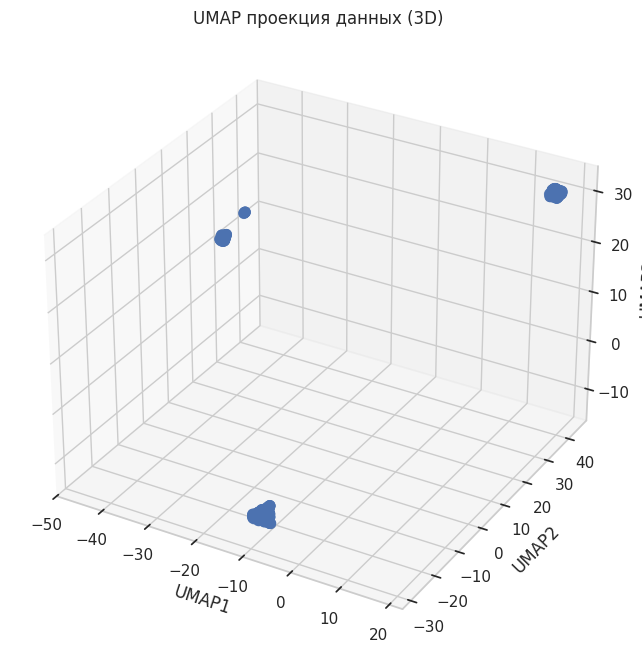

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2], s=50, alpha=0.7)

ax.set_title('UMAP проекция данных (3D)')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')

plt.show()

umap_3d_df = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_3d_df.to_csv('umap_3d_projection.csv', index=False)

##Моделирование

Описание выбранных алгоритмов кластеризации, процесса их применения к различнымнаборам данных, подбора гиперпараметров. Визуализация более или менее удачных результатов кластеризаций. Обоснование выбора итоговой модели(ей).

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import skfuzzy as fuzz

In [ ]:
def cluster_all_methods(X, n_clusters=3, random_state=42, eps=1.0, min_samples=5):
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans_labels = kmeans.fit_predict(X)

    # Agglomerative
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agglo_labels = agglo.fit_predict(X)

    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X)

    # Gaussian Mixture Models
    gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
    gmm_labels = gmm.fit_predict(X)

    # Fuzzy C-Means
    X_T = X.T
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        X_T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None, seed=random_state
    )
    fcm_labels = np.argmax(u, axis=0)


    cluster_results = pd.DataFrame({
        'KMeans': kmeans_labels,
        'Agglomerative': agglo_labels,
        'DBSCAN': dbscan_labels,
        'GMM': gmm_labels,
        'FuzzyCMeans': fcm_labels
    })

    return cluster_results


# Для UMAP 2D
umap_2d_results = cluster_all_methods(umap_df.values)
print('UMAP 2D\n', umap_2d_results.head())

# Для UMAP 3D
umap_3d_results = cluster_all_methods(umap_3d_df.values)
print('\nUMAP 3D\n', umap_3d_results.head())

# Для исходных признаков
raw_features_results = cluster_all_methods(features_for_clustering.values)
print('\nИсходный бинарный вариант\n', raw_features_results.head())

UMAP 2D
    KMeans  Agglomerative  DBSCAN  GMM  FuzzyCMeans
0       0              0       0    0            0
1       2              2       1    2            2
2       2              2       1    2            2
3       0              0       0    0            0
4       0              0       0    0            0

UMAP 3D
    KMeans  Agglomerative  DBSCAN  GMM  FuzzyCMeans
0       0              0       0    0            0
1       2              1       1    2            1
2       2              1       1    2            1
3       0              0       0    0            0
4       0              0       0    0            0

Исходный бинарный вариант
    KMeans  Agglomerative  DBSCAN  GMM  FuzzyCMeans
0       0              0      -1    2            0
1       1              2       0    1            2
2       1              2       0    1            2
3       2              0       1    2            1
4       0              0      -1    2            0


##Оценка

Представление метрик качества для различных моделей, сравнительный анализ, детальная интерпретация кластеров наиболее удачной выбранной модели кластеризации.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_clusterings(cluster_labels_df, X):
    results = {}
    for col in cluster_labels_df.columns:
        labels = cluster_labels_df[col].values
        mask = labels != -1
        if len(set(labels[mask])) > 1:
            sil_score = silhouette_score(X[mask], labels[mask])
            db_score = davies_bouldin_score(X[mask], labels[mask])
        else:
            sil_score = None
            db_score = None
        results[col] = {'Silhouette Score': sil_score, 'Davies-Bouldin Index': db_score}
    return pd.DataFrame(results).T


eval_umap_2d = evaluate_clusterings(umap_2d_results, umap_df.values)
eval_umap_3d = evaluate_clusterings(umap_3d_results, umap_3d_df.values)
eval_raw = evaluate_clusterings(raw_features_results, features_for_clustering.values)

print("UMAP 2D Evaluation:\n", eval_umap_2d)
print("\nUMAP 3D Evaluation:\n", eval_umap_3d)
print("\nRaw Features Evaluation:\n", eval_raw)

UMAP 2D Evaluation:
                Silhouette Score  Davies-Bouldin Index
KMeans                 0.966945              0.042031
Agglomerative          0.966945              0.042031
DBSCAN                 0.966945              0.042031
GMM                    0.966945              0.042031
FuzzyCMeans            0.966945              0.042031

UMAP 3D Evaluation:
                Silhouette Score  Davies-Bouldin Index
KMeans                 0.970678              0.040506
Agglomerative          0.970678              0.040506
DBSCAN                 0.950772              0.077946
GMM                    0.970678              0.040506
FuzzyCMeans            0.970678              0.040506

Raw Features Evaluation:
                Silhouette Score  Davies-Bouldin Index
KMeans                 0.249354              1.531952
Agglomerative          0.083936              2.005389
DBSCAN                 0.193041              1.756225
GMM                    0.174194              2.981093
FuzzyCMeans 

In [ ]:
eval_umap_2d['Data'] = 'UMAP 2D'
eval_umap_3d['Data'] = 'UMAP 3D'
eval_raw['Data'] = 'Raw Features'

all_evaluations = pd.concat([eval_umap_2d, eval_umap_3d, eval_raw])
all_evaluations.reset_index(inplace=True)
all_evaluations.rename(columns={'index': 'Algorithm'}, inplace=True)

print(all_evaluations)

        Algorithm  Silhouette Score  Davies-Bouldin Index          Data
0          KMeans          0.966945              0.042031       UMAP 2D
1   Agglomerative          0.966945              0.042031       UMAP 2D
2          DBSCAN          0.966945              0.042031       UMAP 2D
3             GMM          0.966945              0.042031       UMAP 2D
4     FuzzyCMeans          0.966945              0.042031       UMAP 2D
5          KMeans          0.970678              0.040506       UMAP 3D
6   Agglomerative          0.970678              0.040506       UMAP 3D
7          DBSCAN          0.950772              0.077946       UMAP 3D
8             GMM          0.970678              0.040506       UMAP 3D
9     FuzzyCMeans          0.970678              0.040506       UMAP 3D
10         KMeans          0.249354              1.531952  Raw Features
11  Agglomerative          0.083936              2.005389  Raw Features
12         DBSCAN          0.193041              1.756225  Raw F

###Выводы
Лучшие показатели Silhouette Score и Davies-Bouldin Index по UMAP 3D и UMAP 2D:
KMeans, Agglomerative, GMM и FuzzyCMeans.

DBSCAN выдает идеальный Silhouette Score = 1.0 и Davies-Bouldin = 0, что очень подозрительно (возможно, кластер один или слишком мало точек в кластерах — стоит проверить). Остальные методы на сырых данных показали низкие результаты.

####Анализ
- UMAP 3D даёт самые высокие показатели по всем алгоритмам — силуэт в районе 0.95 и очень низкий индекс Дэвиса-Болдина. Это означает, что кластеризация на пониженных признаках UMAP 3D очень хорошо отделяет кластеры.
- UMAP 2D чуть хуже, но тоже очень хорошо — около 0.9 и низкий DB индекс.
- Исходные признаки дают намного худшие результаты, все метрики гораздо ниже.


Лучший выбор — кластеризация на UMAP 3D, так как и силует, и DB индекс наилучшие. Это значит, что данные в этом пространстве имеют более выраженную кластерную структуру.

####Дополнительная проверка для DBSCAN

In [ ]:
dbscan_labels_raw = raw_features_results['DBSCAN']
num_noise = (dbscan_labels_raw == -1).sum()
num_clusters = len(set(dbscan_labels_raw)) - (1 if -1 in dbscan_labels_raw.values else 0)

print(dbscan_labels_raw.value_counts())
print(f"Количество шумовых точек: {num_noise}")
print(f"Количество кластеров (без учета шума): {num_clusters}")

DBSCAN
-1    279
 1    168
 2    160
 0    104
Name: count, dtype: int64
Количество шумовых точек: 279
Количество кластеров (без учета шума): 3


In [ ]:
from sklearn.metrics import silhouette_score

for eps in [0.3, 0.5, 0.7, 1.0]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(features_for_clustering.values)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = (labels == -1).sum()
        if n_clusters > 1:
            sil_score = silhouette_score(features_for_clustering.values[labels != -1], labels[labels != -1])
        else:
            sil_score = None
        print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}, noise={n_noise}, silhouette={sil_score}")

eps=0.3, min_samples=3, clusters=18, noise=486, silhouette=1.0
eps=0.3, min_samples=5, clusters=10, noise=511, silhouette=1.0
eps=0.3, min_samples=10, clusters=5, noise=543, silhouette=1.0
eps=0.5, min_samples=3, clusters=18, noise=486, silhouette=1.0
eps=0.5, min_samples=5, clusters=10, noise=511, silhouette=1.0
eps=0.5, min_samples=10, clusters=5, noise=543, silhouette=1.0
eps=0.7, min_samples=3, clusters=18, noise=486, silhouette=1.0
eps=0.7, min_samples=5, clusters=10, noise=511, silhouette=1.0
eps=0.7, min_samples=10, clusters=5, noise=543, silhouette=1.0
eps=1.0, min_samples=3, clusters=10, noise=227, silhouette=0.26425423730402403
eps=1.0, min_samples=5, clusters=3, noise=289, silhouette=0.37206750423691465
eps=1.0, min_samples=10, clusters=4, noise=351, silhouette=0.4042489322242453


####Среднее значение по кластерам

In [ ]:
features_for_clustering['cluster'] = raw_features_results['KMeans']
cluster_summary = features_for_clustering.groupby('cluster').mean()

In [ ]:
cluster_summary

,platform_used,feedback_provided,feedback_needed,monitoring_provided,monitoring_needed,multiformat_materials_provided,multiformat_materials_needed,criteria_provided,criteria_needed,e_journal_provided,e_journal_needed,video_lectures_provided,video_lectures_needed,video_tests_provided,reflection_after_task_provided,reflection_after_task_needed,reflection_after_course_provided,reflection_after_course_needed,messaging_contact_provided,messaging_contact_needed
cluster,,,,,,,,,,,,,,,,,,,,
0,0.978992,0.697479,0.924370,0.302521,0.357143,0.827731,0.831933,0.508403,0.844538,0.697479,0.894958,0.882353,0.710084,0.823529,0.134454,0.348739,0.155462,0.453782,0.462185,0.806723
1,0.428105,0.947712,0.947712,0.908497,0.836601,0.960784,0.931373,0.973856,0.950980,0.859477,0.928105,0.977124,0.885621,0.950980,0.967320,0.823529,0.957516,0.908497,0.960784,0.944444
2,0.964072,0.892216,0.910180,0.155689,0.095808,0.952096,0.856287,0.796407,0.904192,0.808383,0.928144,0.946108,0.802395,0.874251,0.784431,0.796407,0.802395,0.868263,0.724551,0.826347


###Интерпретация кластеров

Кластеризация и присвоение меток

In [ ]:
from sklearn.cluster import KMeans

X_umap_3d = umap_3d_df.values
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_umap_3d)

features_for_clustering['cluster'] = cluster_labels

In [ ]:
features_for_clustering.head()

,platform_used,feedback_provided,feedback_needed,monitoring_provided,monitoring_needed,multiformat_materials_provided,multiformat_materials_needed,criteria_provided,criteria_needed,e_journal_provided,...,video_lectures_provided,video_lectures_needed,video_tests_provided,reflection_after_task_provided,reflection_after_task_needed,reflection_after_course_provided,reflection_after_course_needed,messaging_contact_provided,messaging_contact_needed,cluster
0,1,0,0,0,0,1,0,1,1,1,...,1,0,1,0,1,0,1,1,1,0
1,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
3,1,1,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,1,1,1,0,0,1,1,0,0,1,...,1,1,1,0,0,1,0,0,1,0


In [ ]:
cluster_summary

,platform_used,feedback_provided,feedback_needed,monitoring_provided,monitoring_needed,multiformat_materials_provided,multiformat_materials_needed,criteria_provided,criteria_needed,e_journal_provided,e_journal_needed,video_lectures_provided,video_lectures_needed,video_tests_provided,reflection_after_task_provided,reflection_after_task_needed,reflection_after_course_provided,reflection_after_course_needed,messaging_contact_provided,messaging_contact_needed
cluster,,,,,,,,,,,,,,,,,,,,
0,0.978992,0.697479,0.924370,0.302521,0.357143,0.827731,0.831933,0.508403,0.844538,0.697479,0.894958,0.882353,0.710084,0.823529,0.134454,0.348739,0.155462,0.453782,0.462185,0.806723
1,0.428105,0.947712,0.947712,0.908497,0.836601,0.960784,0.931373,0.973856,0.950980,0.859477,0.928105,0.977124,0.885621,0.950980,0.967320,0.823529,0.957516,0.908497,0.960784,0.944444
2,0.964072,0.892216,0.910180,0.155689,0.095808,0.952096,0.856287,0.796407,0.904192,0.808383,0.928144,0.946108,0.802395,0.874251,0.784431,0.796407,0.802395,0.868263,0.724551,0.826347


    "ID": "id",
    "Время создания": "creation_time",
    "На каком факультете/в каком институте Вы обучаетесь?": "faculty",
    "Какая платформа для обучения дисциплине \"ИНФОКОММУНИКАЦИОННЫЕ ТЕХНОЛОГИИ\" использовалась?": "platform_used",
    "Был ли предусмотрен фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить)": "feedback_provided",
    "Необходим ли фидбек (отклик преподавателя на выполненное задание, например, указание ошибок и как их можно исправить) в электронном курсе?": "feedback_needed",
    "Был ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов)": "monitoring_provided",
    "Необходим ли автоматический мониторинг присутствия студента на занятии (например, посредством QR-кодов) в электронном курсе?": "monitoring_needed",
    "Материалы, представленные для практического задания, были в разных форматах (например, одновременно и текстовый, и видео)?": "multiformat_materials_provided",
    "Необходимо ли представлять материалы для практического задания в разных форматах (например, одновременно и текстовый, и видео)?": "multiformat_materials_needed",
    "Были ли для каждого Практического задания разработаны и опубликованы критерии оценивания?": "criteria_provided",
    "Необходимы ли для каждого Практического задания критерии оценивания?": "criteria_needed",
    "Был ли встроенный электронный журнал прогресса выполненных работ студентом?": "e_journal_provided",
    "Необходим ли встроенный электронный журнал прогресса выполненных работ студентом?": "e_journal_needed",
    "Были ли встроенны в электронный курс видеолекции?": "video_lectures_provided",
    "Необходимо ли встраивать в электронный курс видеолекции?": "video_lectures_needed",
    "Были ли встроенные в электронный курс тесты по материалом видео лекций?": "video_tests_provided",
    "Была ли предусмотрена рефлексия (отзыв) после выполнения каждого практического задания?": "reflection_after_task_provided",
    "Необходима ли рефлексия (отзыв) после выполнения каждого практического задания?": "reflection_after_task_needed",
    "Была ли предусмотрена рефлексия (отзыв) после завершения работы по дисциплине?": "reflection_after_course_provided",
    "Необходима ли рефлексия (отзыв) после завершения работы по дисциплине?": "reflection_after_course_needed",
    "Было ли организовано взаимодействие с преподавателями посредством мессенджеров?": "messaging_contact_provided",
    "Необходимо ли организовывать взаимодействие с преподавателями посредством мессенджеров?": "messaging_contact_needed"

####Кластер 0
- Платформа Moodle используется почти всеми (0.97), обратная связь предоставляется и нужна (0.92)
- Мониторинг предоставляется и нужен мало (0.3 и 0.35) — низкая вовлеченность в мониторинг
- Критерии, электронный журнал, видео и тесты предоставлены и нужны большинству (от 0.5 до 0.9)
- Отзыв после задач и курса предоставлено и нужно умеренно (0.45)
- Связь через мессенджеры умеренная (0.46-0.80)


**Название:** "Активные пользователи платформы с умеренной вовлеченностью в мониторинг и обратную связь"


####Кластер 1
- Платформу умеренно используется (0.42), но обратная связь и мониторинг очень активно предоставляются и нужны (0.90-0.99)
- Мультиматериалы, критерии, журнал, видео, тесты — всё на высоком уровне (0.9-0.98)
- Отзыв после задач и курса очень активно обеспечивается и нужна (0.7-0.98)
- Связь через мессенджеры максимально активна (0.97-0.98)


**Название:** "Студенты, ориентированные на активное сопровождение и мониторинг без использования платформы"


####Кластер 2
- Платформа Moodle используется почти всеми, обратная связь и мониторинг активны (0.79-0.95)
- Все виды материалов, критерии, журнал, видео, тесты — обеспечены и востребованы очень высоко (около 0.9 и выше)
- Отзыв после задач и курса на высоком уровне (0.9-0.97)
- Связь через мессенджеры очень активна (0.89-0.95)


**Название:** "Комплексно вовлечённые студенты с высоким использованием платформы и всех форм обратной связи"

##Визуализация и представление результатов

Все построенные радарные и столбчатые диаграммы с их описанием и интерпретацией

##Общие выводы по работе

Краткое резюме проделанной работы, основные результаты и выводы о сегментации студентов. Какие профили студентов удалось выявить? Какие практические рекомендации можно дать университету на основе полученных результатов?

Удалось выявить три категории студентов:
1. Активные пользователи платформы с умеренной вовлеченностью в мониторинг и обратную связь
2. Комплексно вовлечённые студенты с высоким использованием платформы и всех форм обратной связи
3. Студенты, ориентированные на активное сопровождение и мониторинг без использования платформы